In [63]:
from google.colab import files

In [64]:
uploaded = files.upload()

Saving fifa_datos.csv to fifa_datos (1).csv


## 1. Conjunto de Datos FIFA

In [122]:
import pandas as pd
import io

data = pd.read_csv(io.StringIO(uploaded['fifa_datos.csv'].decode('utf-8')))

data.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [154]:
# LIMPIEZA DEL CONJUNTO DE DATOS, OBTENIENDO REGISTROS NUMERICOS.

data = data.drop(["Unnamed: 0"], axis=1)
data = data.drop(["ID"], axis=1)
data = data.drop(["Jersey Number"], axis=1)
data = data.drop(["Loaned From"], axis=1)
data = data.drop(["Release Clause"], axis=1)
for registro in data:
  tipo = type(data[registro][0])
  if (tipo == str) and (registro != "Value") and (registro != "Wage") and (registro != "Release Clause"):
    data = data.drop([registro], axis=1)

In [124]:
# TRANSFORMACIÓN DE DATOS STR A FLOAT EN LOS REGISTRO VALUE.

values = data["Value"]
for i in range(len(values)):
  if values[i].find("M") != -1:
    if values[i].find(".") != -1:
      nlist = values[i].split(".")
      a = nlist[0].replace("€","")
      a = float(a)
      a = a * 1000000
      b = nlist[1].replace("M","")
      b = float(b)
      b = b * 100000
      values[i] = a + b
    else:
      a = values[i].replace("€","")
      b = a.replace("M","000000")
      c = float(b)
      values[i] = c
  elif values[i].find("K") != -1:
    if values[i].find(".") != -1:
      nlist = values[i].split(".")
      a = nlist[0].replace("€","")
      a = float(a)
      a = a * 1000
      b = nlist[1].replace("K","")
      b = float(b)
      b = b * 100
      values[i] = a + b
    else:
      a = values[i].replace("€","")
      b = a.replace("K","000")
      c = float(b)
      values[i] = c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [125]:
# TRANSFORMACIÓN DE DATOS STR A FLOAT EN LOS REGISTRO WAGE

wages = data["Wage"]
for i in range(len(wages)):
  if wages[i].find("M") != -1:
    if wages[i].find(".") != -1:
      nlist = wages[i].split(".")
      a = nlist[0].replace("€","")
      a = float(a)
      a = a * 1000000
      b = nlist[1].replace("M","")
      b = float(b)
      b = b * 100000
      wages[i] = a + b
    else:
      a = wages[i].replace("€","")
      b = a.replace("M","000000")
      c = float(b)
      wages[i] = c
  elif wages[i].find("K") != -1:
    if wages[i].find(".") != -1:
      nlist = wages[i].split(".")
      a = nlist[0].replace("€","")
      a = float(a)
      a = a * 1000
      b = nlist[1].replace("K","")
      b = float(b)
      b = b * 100
      wages[i] = a + b
    else:
      a = wages[i].replace("€","")
      b = a.replace("K","000")
      c = float(b)
      wages[i] = c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [182]:
# LIMPIEZA DE REGISTROS CON VALORES NULOS.

data["Wage"] = pd.to_numeric(data["Wage"], errors='coerce').fillna(0, downcast='infer')
for registro in data:
  data[registro] = data[registro].fillna(0)

In [184]:
# CONJUNTO DE DATOS DEFINITIVO.

data.head(10)

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,110500000,565000,2202,5.0,4.0,4.0,84.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,77000000,405000,2228,5.0,4.0,5.0,84.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,118500000,290000,2143,5.0,5.0,5.0,79.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,72000000,260000,1471,4.0,3.0,1.0,17.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,102000000,355000,2281,4.0,5.0,4.0,93.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,27,91,91,93000000,340000,2142,4.0,4.0,4.0,81.0,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0
6,32,91,91,67000000,420000,2280,4.0,4.0,4.0,86.0,...,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0
7,31,91,91,80000000,455000,2346,5.0,4.0,3.0,77.0,...,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0
8,32,91,91,51000000,380000,2201,4.0,3.0,3.0,66.0,...,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0
9,25,90,93,68000000,94000,1331,3.0,3.0,1.0,13.0,...,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0


In [132]:
from scipy import stats
import pandas as pd
import numpy as np

In [185]:
mAritmetica_fila_fifa = data.mean(axis=1)

print("Media Aritmetica Por Fila: \n" + str(mAritmetica_fila_fifa))

Media Aritmetica Por Fila: 
0        2.583017e+06
1        1.800228e+06
2        2.762665e+06
3        1.680540e+06
4        2.380462e+06
             ...     
18202    1.483605e+03
18203    1.473767e+03
18204    1.478023e+03
18205    1.479953e+03
18206    1.484558e+03
Length: 18207, dtype: float64


In [186]:
mAritmetica_columna_fifa = data.mean(axis=0)

print("Media Aritmetica Por Columna: \n" + str(mAritmetica_columna_fifa))

Media Aritmetica Por Columna: 
Age                         2.512221e+01
Overall                     6.623870e+01
Potential                   7.130730e+01
Value                       2.410696e+06
Wage                        9.731312e+03
Special                     1.597810e+03
International Reputation    1.110287e+00
Weak Foot                   2.939529e+00
Skill Moves                 2.355083e+00
Crossing                    4.960306e+01
Finishing                   4.543082e+01
HeadingAccuracy             5.216027e+01
ShortPassing                5.853199e+01
Volleys                     4.279590e+01
Dribbling                   5.522502e+01
Curve                       4.704647e+01
FKAccuracy                  4.275015e+01
LongPassing                 5.257297e+01
BallControl                 5.821558e+01
Acceleration                6.444373e+01
SprintSpeed                 6.455632e+01
Agility                     6.333619e+01
Reactions                   6.167359e+01
Balance                   

In [187]:
np.median(data)

56.0

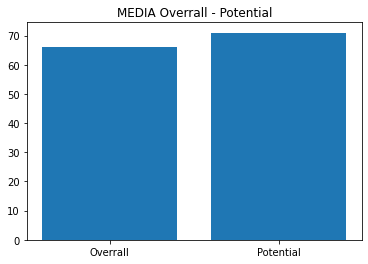

In [190]:
import matplotlib.pyplot as plt

x = ['Overrall', 'Potential']
y = [np.median(data["Overall"]), np.median(data["Potential"])]

plt.title('MEDIA Overrall - Potential')

plt.bar(x, y)

plt.show()

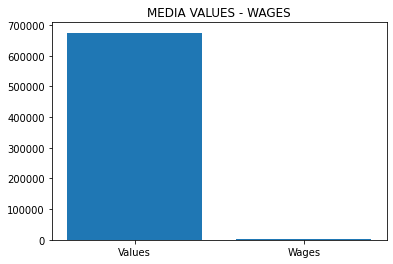

In [191]:
x = ['Values', 'Wages']
y = [np.median(data["Value"]), np.median(data["Wage"])]

plt.title('MEDIA VALUES - WAGES')

plt.bar(x, y)

plt.show()

In [193]:
np.std(data)

Age                         4.669814e+00
Overall                     6.908740e+00
Potential                   6.136327e+00
Value                       5.594779e+06
Wage                        2.199869e+04
Special                     2.725785e+02
International Reputation    3.976190e-01
Weak Foot                   6.766602e-01
Skill Moves                 7.647916e-01
Crossing                    1.851626e+01
Finishing                   1.963892e+01
HeadingAccuracy             1.756246e+01
ShortPassing                1.498498e+01
Volleys                     1.780704e+01
Dribbling                   1.909715e+01
Curve                       1.852905e+01
FKAccuracy                  1.759306e+01
LongPassing                 1.554404e+01
BallControl                 1.693078e+01
Acceleration                1.527143e+01
SprintSpeed                 1.500199e+01
Agility                     1.510142e+01
Reactions                   9.540659e+00
Balance                     1.449318e+01
ShotPower       

In [194]:
print("Desviación Típica Por Columna: \n" + str(np.std(data, 0)))

Desviación Típica Por Columna: 
Age                         4.669814e+00
Overall                     6.908740e+00
Potential                   6.136327e+00
Value                       5.594779e+06
Wage                        2.199869e+04
Special                     2.725785e+02
International Reputation    3.976190e-01
Weak Foot                   6.766602e-01
Skill Moves                 7.647916e-01
Crossing                    1.851626e+01
Finishing                   1.963892e+01
HeadingAccuracy             1.756246e+01
ShortPassing                1.498498e+01
Volleys                     1.780704e+01
Dribbling                   1.909715e+01
Curve                       1.852905e+01
FKAccuracy                  1.759306e+01
LongPassing                 1.554404e+01
BallControl                 1.693078e+01
Acceleration                1.527143e+01
SprintSpeed                 1.500199e+01
Agility                     1.510142e+01
Reactions                   9.540659e+00
Balance                  

In [195]:
np.var(data)

Age                         2.180717e+01
Overall                     4.773069e+01
Potential                   3.765451e+01
Value                       3.130155e+13
Wage                        4.839422e+08
Special                     7.429906e+04
International Reputation    1.581009e-01
Weak Foot                   4.578690e-01
Skill Moves                 5.849062e-01
Crossing                    3.428519e+02
Finishing                   3.856873e+02
HeadingAccuracy             3.084400e+02
ShortPassing                2.245496e+02
Volleys                     3.170907e+02
Dribbling                   3.647013e+02
Curve                       3.433257e+02
FKAccuracy                  3.095158e+02
LongPassing                 2.416172e+02
BallControl                 2.866514e+02
Acceleration                2.332166e+02
SprintSpeed                 2.250596e+02
Agility                     2.280530e+02
Reactions                   9.102417e+01
Balance                     2.100522e+02
ShotPower       

In [196]:
print("Varianza Por Columna: \n" + str(np.var(data, 0)))

Varianza Por Columna: 
Age                         2.180717e+01
Overall                     4.773069e+01
Potential                   3.765451e+01
Value                       3.130155e+13
Wage                        4.839422e+08
Special                     7.429906e+04
International Reputation    1.581009e-01
Weak Foot                   4.578690e-01
Skill Moves                 5.849062e-01
Crossing                    3.428519e+02
Finishing                   3.856873e+02
HeadingAccuracy             3.084400e+02
ShortPassing                2.245496e+02
Volleys                     3.170907e+02
Dribbling                   3.647013e+02
Curve                       3.433257e+02
FKAccuracy                  3.095158e+02
LongPassing                 2.416172e+02
BallControl                 2.866514e+02
Acceleration                2.332166e+02
SprintSpeed                 2.250596e+02
Agility                     2.280530e+02
Reactions                   9.102417e+01
Balance                     2.1005

In [197]:
stats.mode(data)

ModeResult(mode=array([[2.100e+01, 6.600e+01, 7.000e+01, 1.100e+06, 1.000e+03, 1.745e+03,
        1.000e+00, 3.000e+00, 2.000e+00, 6.200e+01, 5.800e+01, 5.800e+01,
        6.400e+01, 4.900e+01, 6.400e+01, 5.800e+01, 4.200e+01, 6.200e+01,
        6.500e+01, 6.900e+01, 6.800e+01, 6.800e+01, 6.500e+01, 6.800e+01,
        6.800e+01, 7.000e+01, 6.800e+01, 6.800e+01, 5.900e+01, 6.500e+01,
        6.200e+01, 5.800e+01, 5.800e+01, 4.500e+01, 6.000e+01, 6.000e+01,
        6.600e+01, 6.200e+01, 8.000e+00, 1.000e+01, 1.200e+01, 1.000e+01,
        1.000e+01]]), count=array([[ 1423,  1163,  1203,   431,  4900,    47, 16532, 11349,  8565,
          528,   462,   646,   876,   402,   717,   400,   485,   625,
          807,   759,   744,   601,   863,   604,   574,   718,   694,
          678,   508,   516,   509,   574,   595,   492,   743,   573,
          617,   590,  1617,  1630,  1629,  1647,  1602]]))

In [198]:
np.corrcoef(data)

array([[1.        , 0.99999999, 0.99999645, ..., 0.99975723, 0.99974544,
        0.99971531],
       [0.99999999, 1.        , 0.99999605, ..., 0.99975893, 0.99974714,
        0.99971701],
       [0.99999645, 0.99999605, 1.        , ..., 0.99972558, 0.99971387,
        0.99968395],
       ...,
       [0.99975723, 0.99975893, 0.99972558, ..., 1.        , 0.99999927,
        0.99999679],
       [0.99974544, 0.99974714, 0.99971387, ..., 0.99999927, 1.        ,
        0.99999812],
       [0.99971531, 0.99971701, 0.99968395, ..., 0.99999679, 0.99999812,
        1.        ]])

In [199]:
np.cov(data)

array([[2.83897005e+14, 1.97828048e+14, 3.04465842e+14, ...,
        1.53962002e+11, 1.53956899e+11, 1.53944727e+11],
       [1.97828048e+14, 1.37852590e+14, 2.12160955e+14, ...,
        1.07285578e+11, 1.07282023e+11, 1.07273541e+11],
       [3.04465842e+14, 2.12160955e+14, 3.26527247e+14, ...,
        1.65112178e+11, 1.65106720e+11, 1.65093701e+11],
       ...,
       [1.53962002e+11, 1.07285578e+11, 1.65112178e+11, ...,
        8.35366735e+07, 8.35348292e+07, 8.35305351e+07],
       [1.53956899e+11, 1.07282023e+11, 1.65106720e+11, ...,
        8.35348292e+07, 8.35331069e+07, 8.35288628e+07],
       [1.53944727e+11, 1.07273541e+11, 1.65093701e+11, ...,
        8.35305351e+07, 8.35288628e+07, 8.35249333e+07]])

In [200]:
data.describe()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,1.820700e+04,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,...,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,25.122206,66.238699,71.307299,2.410696e+06,9731.312133,1597.809908,1.110287,2.939529,2.355083,49.603065,...,48.420607,58.493656,47.156973,47.572088,45.541056,16.572417,16.348382,16.189268,16.345691,16.666831
std,4.669943,6.908930,6.136496,5.594933e+06,21999.290406,272.586016,0.397630,0.676679,0.764813,18.516769,...,15.879699,11.810375,20.025458,21.773243,21.389596,17.692536,16.905507,16.502101,17.032944,17.951898
min,16.000000,46.000000,48.000000,0.000000e+00,0.000000,731.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,62.000000,67.000000,3.000000e+05,1000.000000,1457.000000,1.000000,3.000000,2.000000,38.000000,...,39.000000,51.000000,30.000000,26.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,6.750000e+05,3000.000000,1635.000000,1.000000,3.000000,2.000000,54.000000,...,49.000000,59.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,2.000000e+06,9000.000000,1787.000000,1.000000,3.000000,3.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,1.185000e+08,565000.000000,2346.000000,5.000000,5.000000,5.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [201]:
data.cumsum()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,110500000,565000,2202,5.0,4.0,4.0,84.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,64,188,188,187500000,970000,4430,10.0,8.0,9.0,168.0,...,160.0,191.0,61.0,59.0,49.0,13.0,22.0,30.0,28.0,19.0
2,90,280,281,306000000,1260000,6573,15.0,13.0,14.0,247.0,...,241.0,285.0,88.0,83.0,82.0,22.0,31.0,45.0,43.0,30.0
3,117,371,374,378000000,1520000,8044,19.0,16.0,15.0,264.0,...,281.0,353.0,103.0,104.0,95.0,112.0,116.0,132.0,131.0,124.0
4,144,462,466,480000000,1875000,10325,23.0,21.0,19.0,357.0,...,360.0,441.0,171.0,162.0,146.0,127.0,129.0,137.0,141.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,457332,1205821,1298030,43891300000,177174000,29086489,20211.0,53509.0,42871.0,902990.0,...,881413.0,1064822.0,858473.0,866049.0,829059.0,301694.0,297620.0,294716.0,297575.0,303410.0
18203,457351,1205868,1298093,43891360000,177175000,29087587,20212.0,53511.0,42873.0,903013.0,...,881456.0,1064864.0,858495.0,866064.0,829078.0,301704.0,297629.0,294725.0,297580.0,303422.0
18204,457367,1205915,1298160,43891420000,177176000,29088776,20213.0,53514.0,42875.0,903038.0,...,881511.0,1064905.0,858527.0,866077.0,829089.0,301710.0,297634.0,294735.0,297586.0,303435.0
18205,457384,1205962,1298226,43891480000,177177000,29090004,20214.0,53517.0,42877.0,903082.0,...,881561.0,1064951.0,858547.0,866102.0,829116.0,301724.0,297640.0,294749.0,297594.0,303444.0


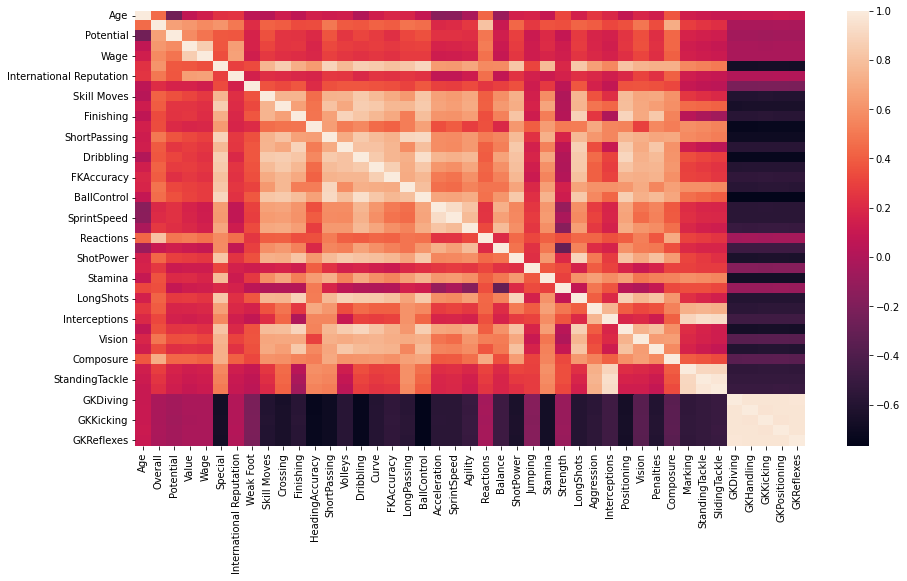

In [204]:
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8
p = sns.heatmap(data.corr())

### 2. Conjunto de Datos Trabajadores

In [ ]:
uploaded = files.upload()

Saving grupos.csv to grupos.csv


In [ ]:
import pandas as pd
import io

data = pd.read_csv('grupos.csv', sep=',' , encoding='latin-1')

data.head(5)

,Ranking \n(1) Tamaño 2021,Ranking \n(1) Tamaño 2020,Variación Ranking Tamaño 2020 - 2021,NUEVO\nGE,\nNombre Grupo Económico,Reporta sus BENEFICIARIOS EFECTIVOS \n(*),No. de Integrantes domiciliados en PARAÍSOS FISCALES\n(**),No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***),Personas \nNaturales (a),Personas \nExtranjeras (b),...,Impuesto Causado ISD 2019,Impuesto Causado IAE 2020 (5),Impuesto Causado IAE 2019 (5),Total Activo \n(6) 2020,Total Activo \n(6) 2019,Total Patrimonio (7) 2020,Total Patrimonio \n(7) 2019,\nTotal Recaudado (8) 2020,\nTotal Recaudado (8) 2019,\nTotal Deuda Generada \n(9)
0,1.0,1.0,0.0,NaN,"BANCO PICHINCHA (DINERS CLUB DEL ECUADOR, BANC...",PARCIALMENTE,2.0,0.0,3,1.0,...,"221,893","3,509,949","3,577,970","18,949,015,666","17,928,760,492","3,688,293,052","3,699,748,891","588,975,950","667,872,172",NaN
1,2.0,2.0,0.0,NaN,"ALMACENES JUAN ELJURI (BANCO DEL AUSTRO, AEKIA...",PARCIALMENTE,45.0,42.0,17,19.0,...,"4,339,679","796,827","945,874","6,417,335,168","6,436,090,837","1,878,733,441","1,955,377,497","127,087,663","190,328,750",NaN
2,3.0,3.0,0.0,NaN,"CORPORACIÓN FAVORITA (COMERCIAL KIWY, SUKASA, ...",PARCIALMENTE,4.0,5.0,20,3.0,...,"1,617,778",0,0,"3,448,646,302","3,343,835,273","2,427,005,282","2,314,556,018","144,524,011","139,310,219",NaN
3,4.0,5.0,1.0,NaN,"BANCO DE GUAYAQUIL (CORPORACION MULTIBG, FIDEI...",SI,2.0,0.0,9,0.0,...,"86,918","4,785,739","5,678,838","6,014,463,154","5,334,073,117","784,042,300","791,999,072","206,200,661","234,359,513",NaN
4,5.0,4.0,-1.0,NaN,SCHLUMBERGER DEL ECUADOR (CONSORCIO SHUSHUFIND...,NO,8.0,0.0,0,0.0,...,"237,591",0,0,"3,286,786,210","3,616,608,480","2,426,480,097","2,305,837,270","202,204,211","152,342,627",NaN


In [ ]:
data.columns.values

array(['Ranking \n(1) Tamaño  2021', 'Ranking \n(1) Tamaño  2020',
       'Variación Ranking Tamaño 2020 - 2021', 'NUEVO\nGE',
       '\nNombre Grupo Económico',
       'Reporta sus BENEFICIARIOS EFECTIVOS \n(*)',
       'No. de Integrantes domiciliados en PARAÍSOS FISCALES\n(**)',
       'No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***)',
       'Personas \nNaturales (a)    ', 'Personas \nExtranjeras (b)    ',
       'Sociedades \nNacionales (c)', 'Sociedades \nExtranjeras (d)',
       'Contribuyentes\n Especiales',
       'Grandes \nContribuyentes e \nImportancia \nRecaudatoria',
       'Instituciones \nFinancieras (2)', 'Medios de \nComunicación (3)',
       'Total Integrantes e=a+b+c+d', 'Ranking Contribución I.R. 2020',
       'Ranking Contribución I.R. 2019',
       'Variación Ranking Contribución I.R. \n2019-2020',
       'Impuesto a la Renta Causado (4) 2020', 'Total Ingresos 2020',
       'Contribución   I.R. 2020', '

In [ ]:
mAritmetica_fila_trabajadores = data.mean(axis=1)

print("Media Aritmetica Por Fila: \n" + str(mAritmetica_fila_trabajadores))

Media Aritmetica Por Fila: 
0        9.090909
1       40.666667
2       19.400000
3        6.916667
4        7.200000
          ...    
299    103.600000
300     61.000000
301     98.200000
302           NaN
303    236.571429
Length: 304, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
mAritmetica_columna_trabajadores = data.mean(axis=0)

print("Media Aritmetica Por Columna: \n" + str(mAritmetica_columna_trabajadores))

Media Aritmetica Por Columna: 
Ranking \n(1) Tamaño  2021                                                                                      151.500000
Ranking \n(1) Tamaño  2020                                                                                      151.500000
Variación Ranking Tamaño 2020 - 2021                                                                              0.000000
No. de Integrantes domiciliados en PARAÍSOS FISCALES\n(**)                                                        3.003300
No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***)      2.613861
Personas \nExtranjeras (b)                                                                                        2.217822
Grandes \nContribuyentes e \nImportancia \nRecaudatoria                                                           2.435644
Instituciones \nFinancieras (2)                                                                             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
import math

imprent2020 = data["Impuesto a la Renta Causado (4) 2020"]
intimprent2020  = []
for impuesto in imprent2020:
  a = str(impuesto).replace(",","")
  intimprent2020.append(float(a))
intimprent2020n = [x for x in intimprent2020 if math.isnan(x) == False]

totalingresos2020 = data["Total Ingresos 2020"]
inttotalingresos2020  = []
for ingreso in totalingresos2020:
  a = str(ingreso).replace(",","")
  inttotalingresos2020.append(float(a))
inttotalingresos2020n = [x for x in inttotalingresos2020 if math.isnan(x) == False]

totalpatrimonio2020 = data["Total Patrimonio (7) 2020"]
inttotalpatrimonio2020  = []
for patrimonio in totalpatrimonio2020:
  a = str(patrimonio).replace(",","")
  inttotalpatrimonio2020.append(float(a))
inttotalpatrimonio2020n = [x for x in inttotalpatrimonio2020 if math.isnan(x) == False]


imprent2019 = data["Impuesto a la Renta Causado (4) 2019"]
intimprent2019 = []
for impuesto in imprent2019:
  a = str(impuesto).replace(",","")
  intimprent2019.append(float(a))
intimprent2019n = [x for x in intimprent2019 if math.isnan(x) == False]

totalingresos2019 = data["Total Ingresos 2019"]
inttotalingresos2019  = []
for ingreso in totalingresos2019:
  a = str(ingreso).replace(",","")
  inttotalingresos2019.append(float(a))
inttotalingresos2019n = [x for x in inttotalingresos2019 if math.isnan(x) == False]

totalpatrimonio2019 = data["Total Patrimonio \n(7) 2019"]
inttotalpatrimonio2019  = []
for patrimonio in totalpatrimonio2020:
  a = str(patrimonio).replace(",","")
  inttotalpatrimonio2019.append(float(a))
inttotalpatrimonio2019n = [x for x in inttotalpatrimonio2019 if math.isnan(x) == False]

print("Media Impuesto a la Renta Causado 2020: " + str(np.median(intimprent2020n)))
print("Media Total Ingresos 2020: " + str(np.median(inttotalingresos2020n)))
print("Media Total Patrimonio 2020: " + str(np.median(inttotalpatrimonio2020n)))
print("Media Impuesto a la Renta Causado 2019: " + str(np.median(intimprent2019n)))
print("Media Total Ingresos 2019: " + str(np.median(inttotalingresos2019n)))
print("Media Total Patrimonio 2019: " + str(np.median(inttotalpatrimonio2019n)))

Media Impuesto a la Renta Causado 2020: 1091862.0
Media Total Ingresos 2020: 90133841.0
Media Total Patrimonio 2020: 55152829.0
Media Impuesto a la Renta Causado 2019: 1944543.0
Media Total Ingresos 2019: 105054214.0
Media Total Patrimonio 2019: 55152829.0


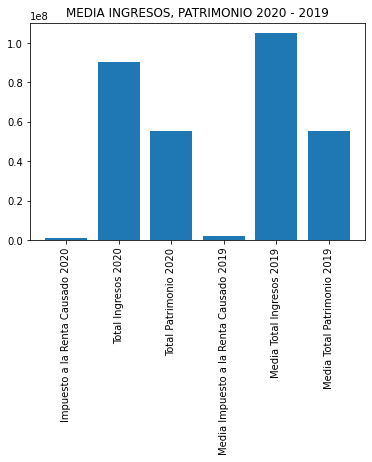

In [ ]:
x = ['Impuesto a la Renta Causado 2020', 'Total Ingresos 2020', 'Total Patrimonio 2020', 'Media Impuesto a la Renta Causado 2019', 'Media Total Ingresos 2019', 'Media Total Patrimonio 2019']
y = [np.median(intimprent2020n), np.median(inttotalingresos2020n), np.median(inttotalpatrimonio2020n), np.median(intimprent2019n), np.median(inttotalingresos2019n), np.median(inttotalpatrimonio2019n)]

plt.title("MEDIA INGRESOS, PATRIMONIO 2020 - 2019")

plt.bar(x, y)

plt.xticks(rotation=90)

plt.show()

In [ ]:
print("Desviación Típica Impuesto a la Renta Causado 2020: " + str(np.std(intimprent2020n)))
print("Desviación Típica Total Ingresos 2020: " + str(np.std(inttotalingresos2020n)))
print("Desviación Típica Total Patrimonio 2020: " + str(np.std(inttotalpatrimonio2020n)))
print("Desviación Típica Impuesto a la Renta Causado 2019: " + str(np.std(intimprent2019n)))
print("Desviación Típica Total Ingresos 2019: " + str(np.std(inttotalingresos2019n)))
print("Desviación Típica Total Patrimonio 2019: " + str(np.std(inttotalpatrimonio2019n)))

Desviación Típica Impuesto a la Renta Causado 2020: 60777648.956378855
Desviación Típica Total Ingresos 2020: 3472566102.7603607
Desviación Típica Total Patrimonio 2020: 2742142061.480038
Desviación Típica Impuesto a la Renta Causado 2019: 101756714.85863273
Desviación Típica Total Ingresos 2019: 4075102385.1872582
Desviación Típica Total Patrimonio 2019: 2742142061.480038


In [ ]:
print("Desviación Típica Por Columna: \n" + str(np.std(data, 0)))

Desviación Típica Por Columna: 
Ranking \n(1) Tamaño  2021                                                                                      87.179413
Ranking \n(1) Tamaño  2020                                                                                      87.179413
Variación Ranking Tamaño 2020 - 2021                                                                            14.614925
No. de Integrantes domiciliados en PARAÍSOS FISCALES\n(**)                                                      26.344318
No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***)    23.087709
Personas \nExtranjeras (b)                                                                                      19.430134
Grandes \nContribuyentes e \nImportancia \nRecaudatoria                                                         21.160747
Instituciones \nFinancieras (2)                                                                                  7

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [ ]:
print("Varianza Impuesto a la Renta Causado 2020: " + str(np.var(intimprent2020n)))
print("Varianza Total Ingresos 2020: " + str(np.var(inttotalingresos2020n)))
print("Varianza Total Patrimonio 2020: " + str(np.var(inttotalpatrimonio2020n)))
print("Varianza Impuesto a la Renta Causado 2019: " + str(np.var(intimprent2019n)))
print("Varianza Total Ingresos 2019: " + str(np.var(inttotalingresos2019n)))
print("Varianza Total Patrimonio 2019: " + str(np.var(inttotalpatrimonio2019n)))

Varianza Impuesto a la Renta Causado 2020: 3693922612664819.5
Varianza Total Ingresos 2020: 1.2058715338040281e+19
Varianza Total Patrimonio 2020: 7.519343085337993e+18
Varianza Impuesto a la Renta Causado 2019: 1.0354429018821086e+16
Varianza Total Ingresos 2019: 1.660645944975888e+19
Varianza Total Patrimonio 2019: 7.519343085337993e+18


In [ ]:
print("Varianza Por Columna: \n" + str(np.var(data, 0)))

Varianza Por Columna: 
Ranking \n(1) Tamaño  2021                                                                                      7600.250000
Ranking \n(1) Tamaño  2020                                                                                      7600.250000
Variación Ranking Tamaño 2020 - 2021                                                                             213.596026
No. de Integrantes domiciliados en PARAÍSOS FISCALES\n(**)                                                       694.023091
No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***)     533.042316
Personas \nExtranjeras (b)                                                                                       377.530111
Grandes \nContribuyentes e \nImportancia \nRecaudatoria                                                          447.777211
Instituciones \nFinancieras (2)                                                                              

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3721: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [ ]:
corr2020 = np.corrcoef(intimprent2020n, inttotalingresos2020n, inttotalpatrimonio2020n)
corr2019 = np.corrcoef(intimprent2019n, inttotalingresos2019n, inttotalpatrimonio2019n)

print("Correlación Impuestos, Ingresos, Patrimonio 2020: \n" + str(corr2020))
print("Correlación Impuestos, Ingresos, Patrimonio 2019: \n" + str(corr2019))

Correlación Impuestos, Ingresos, Patrimonio 2020: 
[[1.         0.99570426]
 [0.99570426 1.        ]]
Correlación Impuestos, Ingresos, Patrimonio 2019: 
[[1.         0.99635843]
 [0.99635843 1.        ]]


In [ ]:
cov2020 = np.cov(intimprent2020n, inttotalingresos2020n, inttotalpatrimonio2020n)
cov2019 = np.cov(intimprent2019n, inttotalingresos2019n, inttotalpatrimonio2019n)

print("Covarianza Impuestos, Ingresos, Patrimonio 2020: \n" + str(cov2020))
print("Covarianza Impuestos, Ingresos, Patrimonio 2019: \n" + str(cov2019))

Covarianza Impuestos, Ingresos, Patrimonio 2020: 
[[3.70615414e+15 2.10843622e+17]
 [2.10843622e+17 1.20986449e+19]]
Covarianza Impuestos, Ingresos, Patrimonio 2019: 
[[1.03887152e+16 4.14527059e+17]
 [4.14527059e+17 1.66614477e+19]]


Correlación Datos 2020


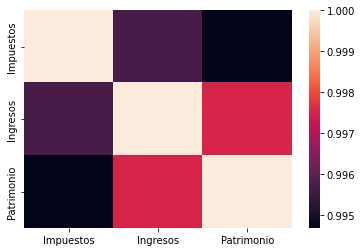

In [ ]:
df1 = pd.DataFrame({
    "Impuestos": intimprent2020n,
    "Ingresos": inttotalingresos2020n,
    "Patrimonio": inttotalpatrimonio2020n})

print("Correlación Datos 2020")
sns.heatmap(df1.corr())

Correlación Datos 2019


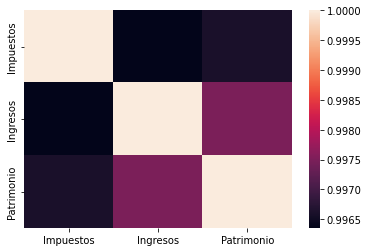

In [ ]:
df2 = pd.DataFrame({
    "Impuestos": intimprent2019n,
    "Ingresos": inttotalingresos2019n,
    "Patrimonio": inttotalpatrimonio2019n})

print("Correlación Datos 2019")
sns.heatmap(df2.corr())

## 3. Conclusiones:

Mediante la realización de esta practica, he podido recordar la aplicación de medidas estadisticas en el lenguaje de programación python. Se a descrito los dos conjuntos de datos, FIFA y trabajadores, haciendo uso de estadistica descriptiva mediante medidas como media, varianza, correlación, covarianza y graficos. Se ha explorado la utilidad de representar graficamente las correlaciones mediante mapas de calor proporcionados por la libreria de seaborn.